### Why data cleaning is relevant?

#### *  Incomplete data
#### *  The data may contain errors.
#### *  Inconsistent data


##   Main Goal: perform all steps within the data preparation process on the financial dataset.
#### In this project I am using the Financial sample for power bi given by microsoft for free

In [61]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as p
import plotly.graph_objects as go
import seaborn as sns

### Reading the dataframe 

In [62]:
df = pd.read_excel(r"D:\Exccel Work\Financial Sample.xlsx")
print(df.head())

      Segment  Country    Product Discount Band  Units Sold  \
0  Government   Canada  Carretera           NaN      1618.5   
1  Government  Germany  Carretera           NaN      1321.0   
2   Midmarket   France  Carretera           NaN      2178.0   
3   Midmarket  Germany  Carretera           NaN       888.0   
4   Midmarket   Mexico  Carretera           NaN      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                    3          20      32370.0        0.0  32370.0  16185.0   
1                    3          20      26420.0        0.0  26420.0  13210.0   
2                    3          15      32670.0        0.0  32670.0  21780.0   
3                    3          15      13320.0        0.0  13320.0   8880.0   
4                    3          15      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month Number Month Name  Year    Product ID  
0  16185.0 2014-01-01             1    January  2014  PRD-4821-B8L  
1 

### Indicating how many rows and columns

In [63]:
df.shape

(700, 17)

### Understanding the structure of a dataframe and identifying missing or problematic data.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

### Checking the data types of each column in the dataframe

In [65]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price             int64
Sale Price                      int64
Gross Sales                   float64
Discounts                     float64
 Sales                        float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
Product ID                     object
dtype: object

### Identifying missing data in the dataset, and summing the values

In [66]:
print(df.isnull().sum())

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
Product ID              0
dtype: int64


#### It is found that the column "discount band" has missing data.


### Identifying outliers

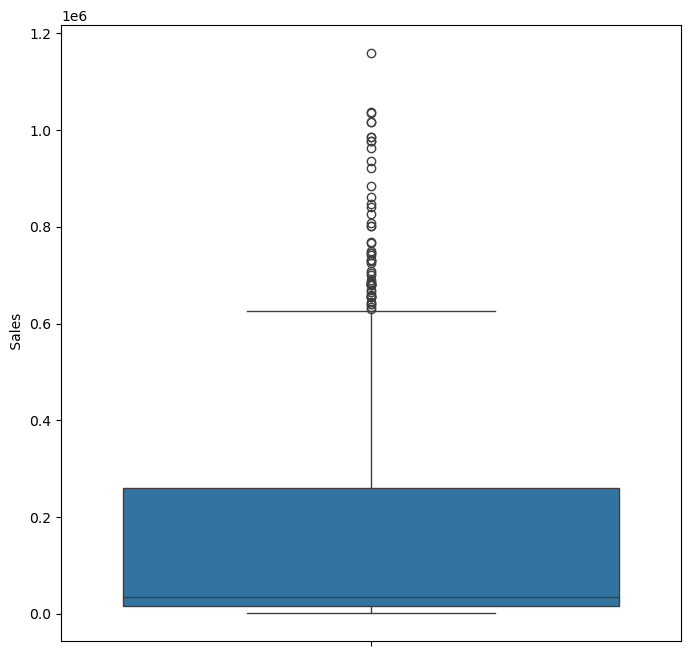

In [67]:
fig = plt.figure(figsize=(8,8))
sb.boxplot(y=df[" Sales"])          #Note : There's space above Sales
plt.show()


#### The two outliers in total sales are at approximately 12,000  and  24,000, as they are represented by individual points outside the upper whisker.

### Statistics

In [68]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


### Visualizing the categorical variables  
### (observing only the columns that are categorical (of type object))

In [69]:
df.describe(include=['object'])

,Segment,Country,Product,Discount Band,Month Name,Product ID
count,700,700,700,647,700,700
unique,5,5,6,3,12,700
top,Government,Canada,Paseo,High,October,PRD-9619-C2Z
freq,300,140,202,245,140,1


#### Analysis:

#### unique: To determine the number of unique values, we can see there are 5 different values in the "Segment" column.

#### top: To see the most frequently occurring value, which is "Government."

#### freq: The frequency at which the value "Government" is repeated, which is 300 times.

### Arrival date week number 

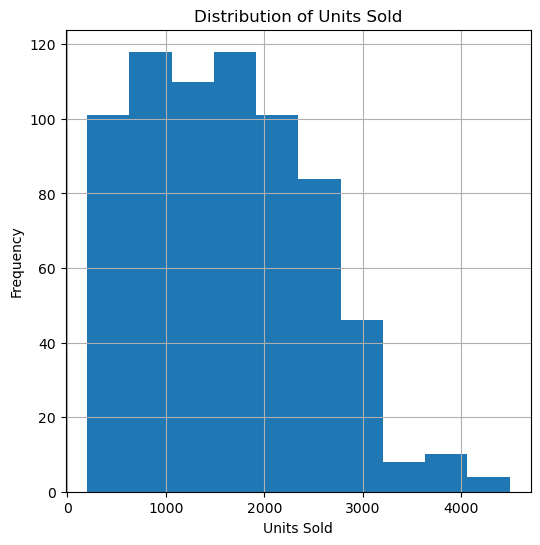

In [70]:
df['Units Sold'].hist(figsize=(6, 6))
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

In [71]:
mean = df['Profit'].mean()
median = df['Profit'].median()
mode = df['Profit'].mode()
skew = df['Profit'].skew()
kurt = df['Profit'].kurt()

print("The mean is:", mean)
print("The median is:", median)
print("The mode is:", mode)
print("The skew is:", skew)
print("The kurt is:", kurt)

The mean is: 24133.860371428567
The median is: 9242.199999999999
The mode is: 0    0.0
Name: Profit, dtype: float64
The skew is: 2.712151264436725
The kurt is: 8.678616215703945


### Checking for duplicates

In [72]:
df.duplicated().sum()

np.int64(0)

#### There are 0 rows with the same data

## Exploratory Data Analysis

array([[<Axes: title={'center': 'Units Sold'}>,
        <Axes: title={'center': 'Manufacturing Price'}>,
        <Axes: title={'center': 'Sale Price'}>],
       [<Axes: title={'center': 'Gross Sales'}>,
        <Axes: title={'center': 'Discounts'}>,
        <Axes: title={'center': ' Sales'}>],
       [<Axes: title={'center': 'COGS'}>,
        <Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Month Number'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

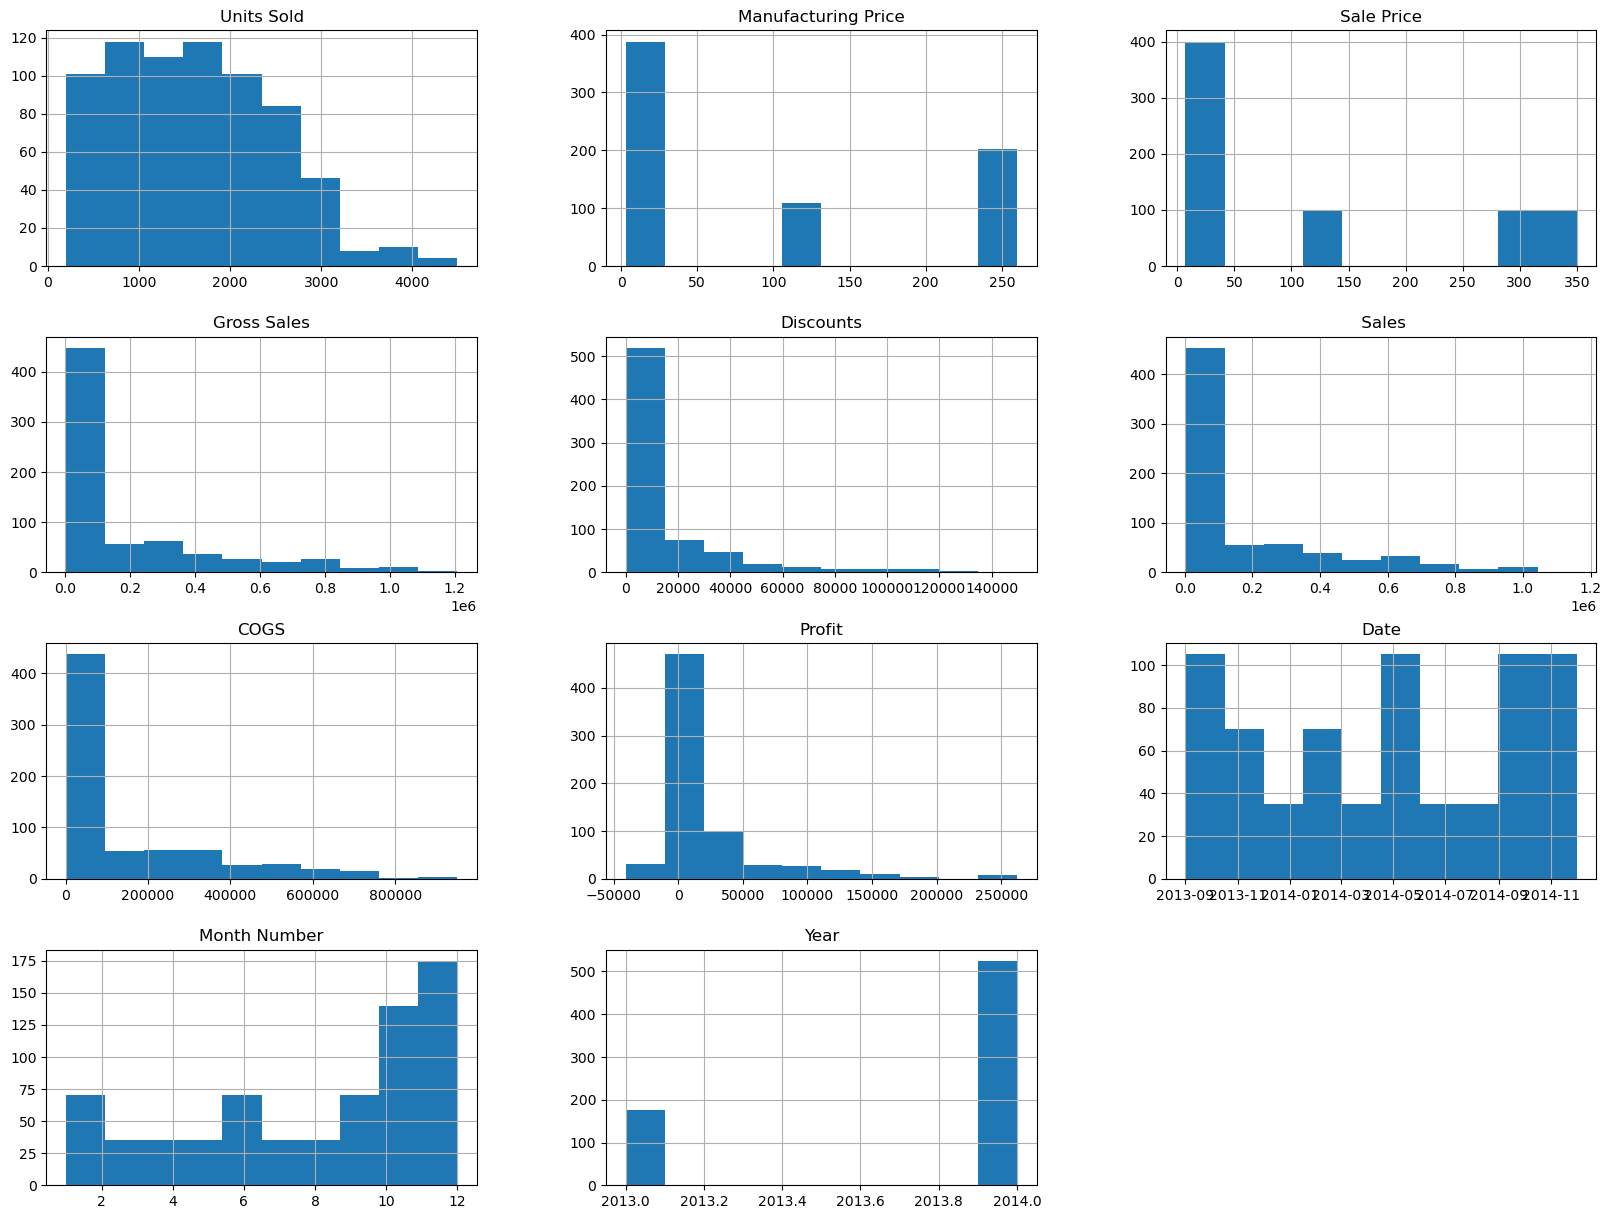

In [73]:
df.hist(figsize=(20,15))

### Looking into the 'Profit' variable

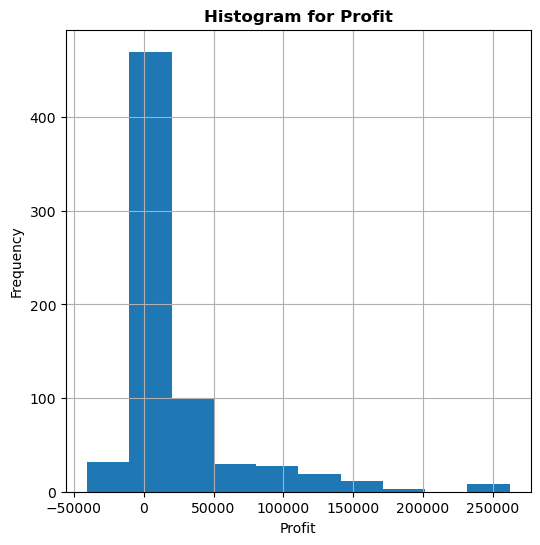

In [74]:
df['Profit'].hist(figsize=(6, 6))
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram for Profit', fontweight="bold")
plt.show()

### Plotting Sales vs Profit by Month

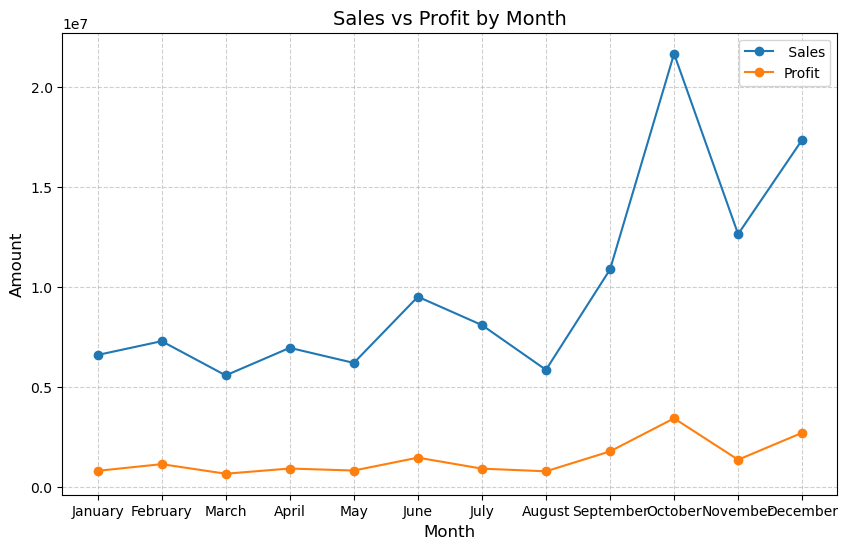

In [75]:
df_grouped = df.groupby("Month Name")[[" Sales", "Profit"]].sum().reset_index()

# Sort months in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df_grouped["Month Name"] = pd.Categorical(df_grouped["Month Name"], categories=month_order, ordered=True)
df_grouped = df_grouped.sort_values("Month Name")

# Plot Sales vs Profit
plt.figure(figsize=(10,6))
plt.plot(df_grouped["Month Name"], df_grouped[" Sales"], marker='o', label=" Sales")
plt.plot(df_grouped["Month Name"], df_grouped["Profit"], marker='o', label="Profit")

# Add titles and labels
plt.title("Sales vs Profit by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show graph
plt.show()


### Plotting month vs sales

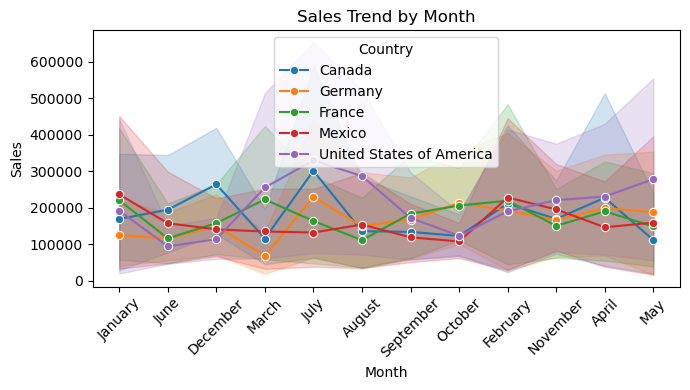

In [76]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=45, fontsize=10)
sb.lineplot(data=df, x='Month Name', y=' Sales', marker='o', hue='Country')
plt.title("Sales Trend by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

### Analyzing the categorical variables

In [77]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Segment,Country,Product,Discount Band,Month Name,Product ID
0,Government,Canada,Carretera,NaN,January,PRD-4821-B8L
1,Government,Germany,Carretera,NaN,January,PRD-5711-N6S
2,Midmarket,France,Carretera,NaN,June,PRD-9073-H7N
3,Midmarket,Germany,Carretera,NaN,June,PRD-5809-N2R
4,Midmarket,Mexico,Carretera,NaN,June,PRD-2093-P7V


### Visualization

In [78]:
for col in df_cat.columns:
  print(f"{col}: \n{df_cat[col].unique()}\n")

Segment: 
['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']

Country: 
['Canada' 'Germany' 'France' 'Mexico' 'United States of America']

Product: 
['Carretera' 'Montana' 'Paseo' 'Velo' 'VTT' 'Amarilla']

Discount Band: 
[nan 'Low' 'Medium' 'High']

Month Name: 
['January' 'June' 'December' 'March' 'July' 'August' 'September' 'October'
 'February' 'November' 'April' 'May']

Product ID: 
['PRD-4821-B8L' 'PRD-5711-N6S' 'PRD-9073-H7N' 'PRD-5809-N2R'
 'PRD-2093-P7V' 'PRD-5962-H9D' 'PRD-4812-E7N' 'PRD-5578-B5A'
 'PRD-1530-S6T' 'PRD-1475-E8S' 'PRD-2621-L9F' 'PRD-3715-N6F'
 'PRD-7707-V4L' 'PRD-6953-F6D' 'PRD-7099-R1S' 'PRD-8732-L7R'
 'PRD-9272-C9E' 'PRD-3759-X1L' 'PRD-1888-B6B' 'PRD-4387-W7N'
 'PRD-2690-Q1R' 'PRD-9026-Y3L' 'PRD-9035-S6H' 'PRD-6301-Q5X'
 'PRD-6254-N9I' 'PRD-2749-V7D' 'PRD-5449-H5E' 'PRD-5750-W2Y'
 'PRD-2171-S4U' 'PRD-3747-L2Y' 'PRD-4009-A2U' 'PRD-6080-R6Z'
 'PRD-4958-V7Q' 'PRD-9398-L6T' 'PRD-5792-D8Y' 'PRD-9947-D1P'
 'PRD-7811-D3S' 'PRD-1650-K4X' 'PRD

### Plotting the COGS

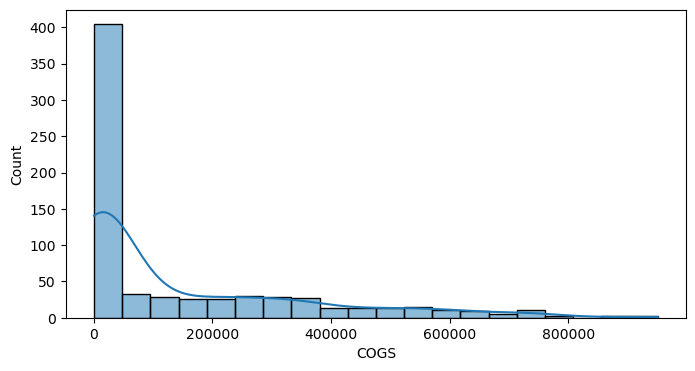

In [79]:
plt.figure(figsize=(8,4))
sb.histplot(data=df, x='COGS', bins=20, kde=True)  # kde=True shows a smooth curve
plt.show()


### Client's preference for the type of room

C:\Users\pc\AppData\Local\Temp\ipykernel_2640\1007244631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index, palette='viridis')


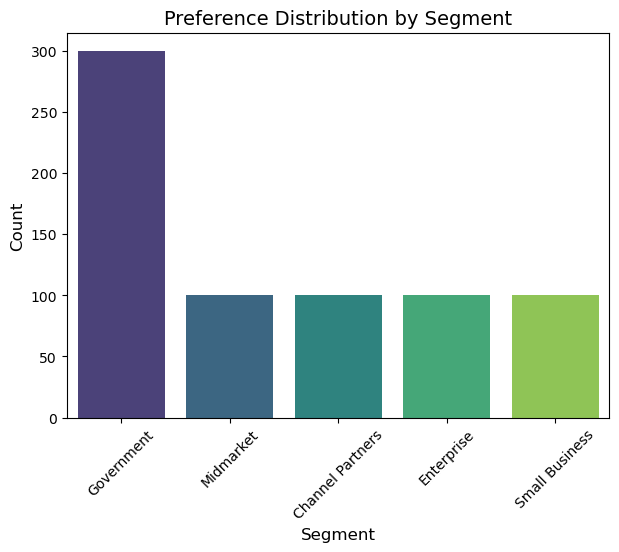

In [80]:
plt.figure(figsize=(7,5))
sb.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index, palette='viridis')

plt.title("Preference Distribution by Segment", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


#### It is observed that Government is prefered


### Product preference by country


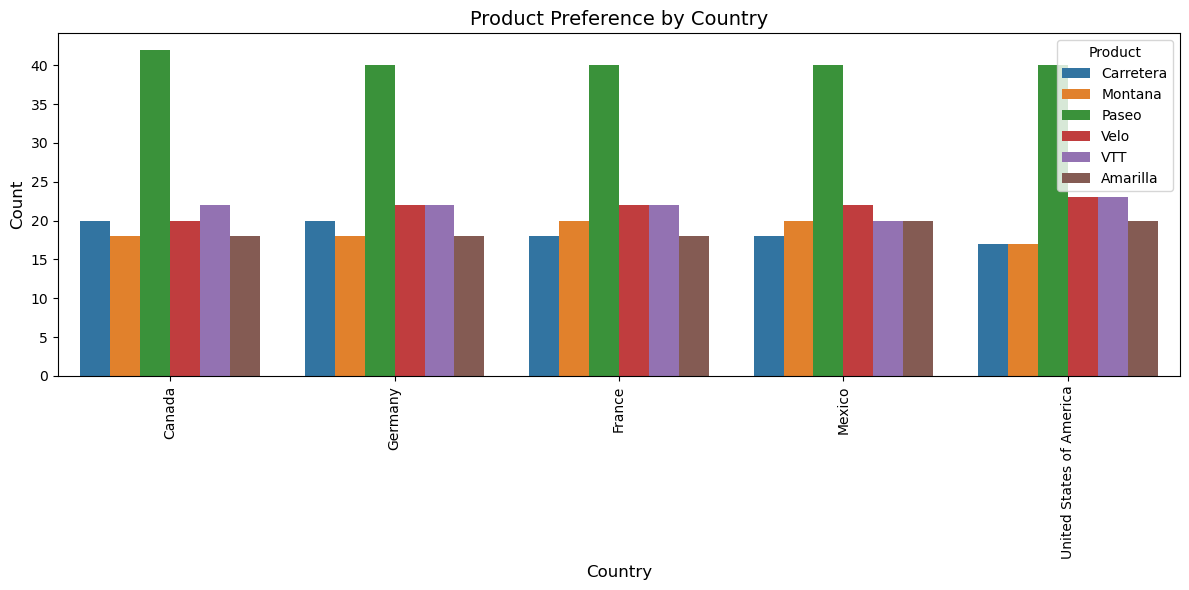

In [81]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='Country', hue='Product', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Product Preference by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Product")
plt.tight_layout()
plt.show()

#### It is observed that the majority of countries prefer Paseo

### Analysis of Preference by country and segment

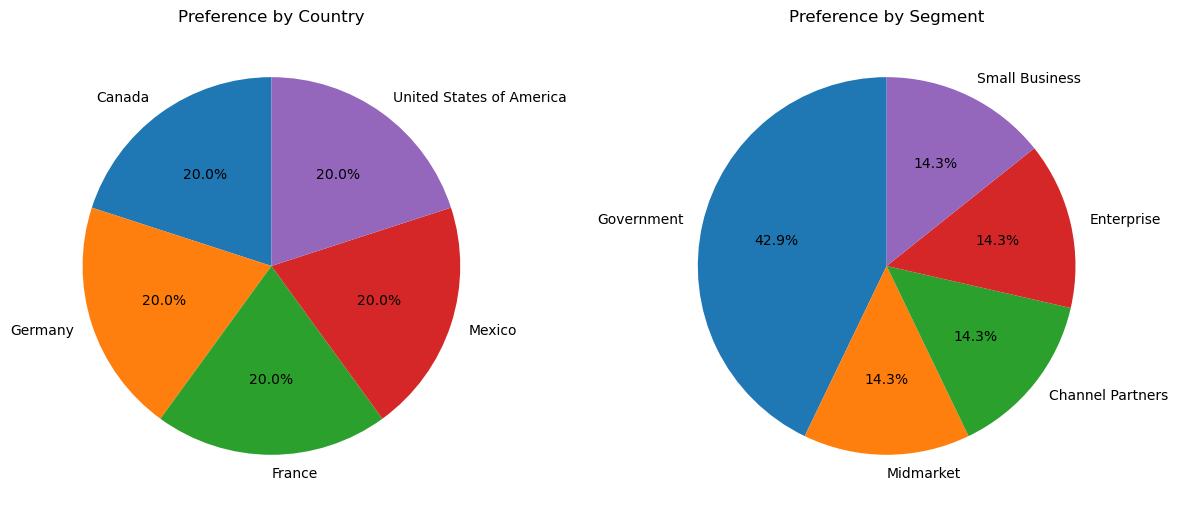

In [84]:
# First pie chart: Preference by Country
country_counts = df['Country'].value_counts()

# Second pie chart: Preference by Segment
segment_counts = df['Segment'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart 1 - Countries
ax[0].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Preference by Country')

# Pie Chart 2 - Market Segment
ax[1].pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Preference by Segment')

plt.tight_layout()
plt.show()


### Top 10 highest COGS

C:\Users\pc\AppData\Local\Temp\ipykernel_2640\1356977965.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=top_cogs, x="COGS", y=top_cogs.index, palette="coolwarm")


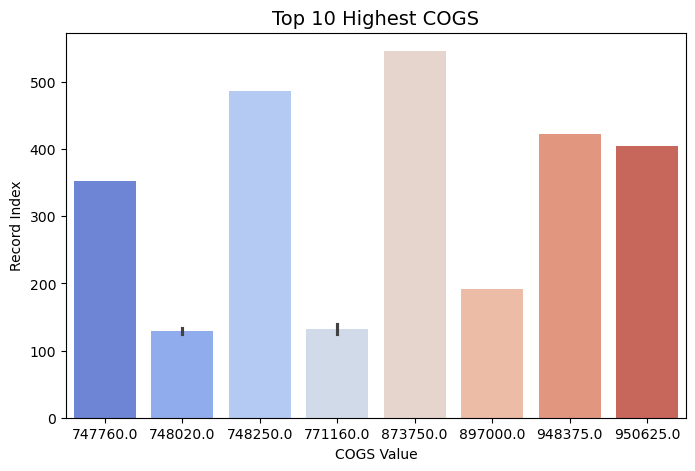

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Sort data by COGS
top_cogs = df.sort_values(by="COGS", ascending=False).head(10)

plt.figure(figsize=(8,5))
sb.barplot(data=top_cogs, x="COGS", y=top_cogs.index, palette="coolwarm")
plt.title("Top 10 Highest COGS", fontsize=14)
plt.xlabel("COGS Value")
plt.ylabel("Record Index")
plt.show()


### Mapping

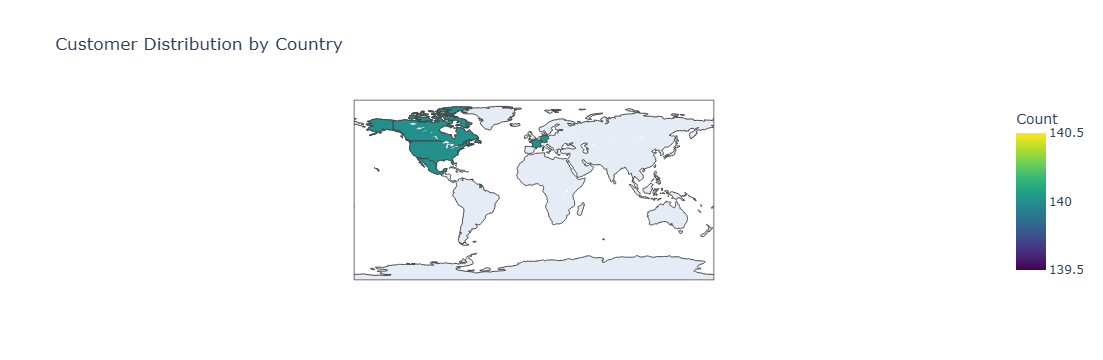

In [92]:
# Example: df has 'country' and 'value' columns
# Replace with your dataset's actual column names
country_data = df['Country'].value_counts().reset_index()
country_data.columns = ['Country', 'Count']

# Create the map
fig = p.choropleth(
    country_data,
    locations="Country",
    locationmode="country names",
    color="Count",
    color_continuous_scale="Viridis",
    title="Customer Distribution by Country"
)

fig.show()


### How much is paid for one night of accommodation?

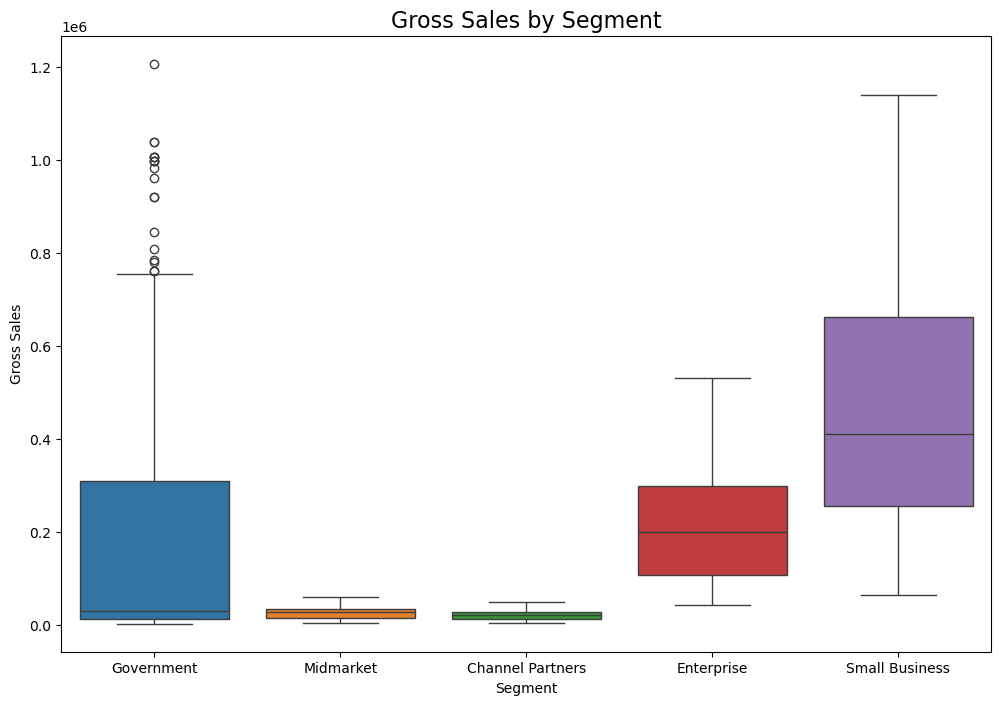

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Replace 'Category' with your categorical column
# Example: Replace 'Gross Sales' with the actual column in your dataset
plt.figure(figsize=(12,8))
sns.boxplot(x='Segment', y='Gross Sales', data=df, hue='Segment')

plt.title('Gross Sales by Segment', fontsize=16)
plt.xlabel('Segment')
plt.ylabel('Gross Sales')
plt.show()


### Is the distribution of Gross Sales homogeneous across the months?

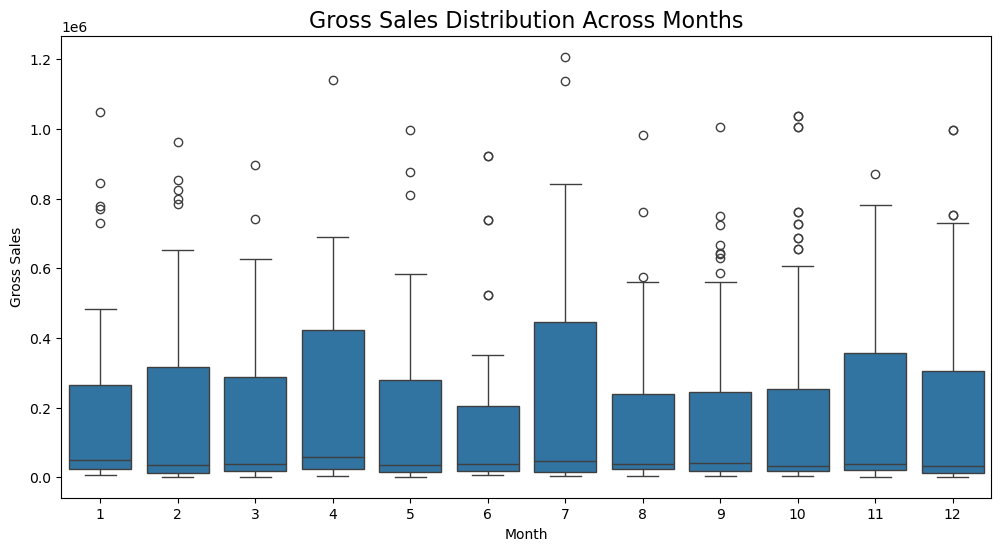

In [101]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month Number', y='Gross Sales', data=df)
plt.title('Gross Sales Distribution Across Months', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Gross Sales')
plt.show()

#### The monthly profit trend shows a strong upward trajectory over the year, with a significant peak in December. This indicates that the business is most profitable during the holiday season.

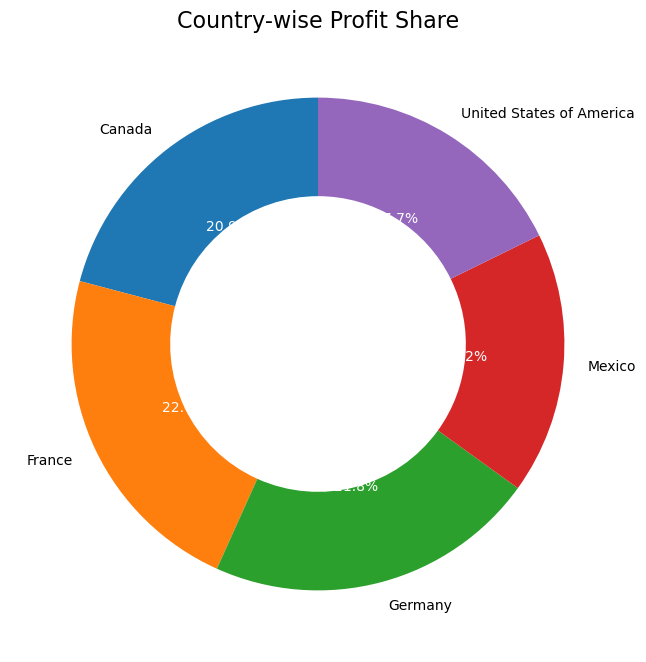

In [102]:
# Group by Country and calculate total profit
country_profit = df.groupby("Country")["Profit"].sum()

# Plot Doughnut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    country_profit,
    labels=country_profit.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}  # This makes it a doughnut
)

# Make the text size better
for t in texts:
    t.set(size=10)
for at in autotexts:
    at.set(size=10, color='white')

# Title
plt.title("Country-wise Profit Share", fontsize=16)

# Show chart
plt.show()

#### France has the largest share at 22.4%.

#### Germany is close behind at 21.6%.

#### Canada holds 20.0%.

#### United States of America has 17.7%.

#### Mexico has the smallest share at 16.2%.

## Data Cleaning

#### To solve the problem of missing data, let's examine which variables have missing data 
#### and what can be done in each case

In [114]:
print(df.isnull().sum())

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
Product ID              0
dtype: int64


In [118]:
df["Discount Band"].isna().sum()

np.int64(53)

In [119]:
df[["Discount Band", "Country", "Profit", " Sales"]].describe(include="all")

,Discount Band,Country,Profit,Sales
count,647,700,700.000000,7.000000e+02
unique,3,5,NaN,NaN
top,High,Canada,NaN,NaN
freq,245,140,NaN,NaN
mean,NaN,NaN,24133.860371,1.696091e+05
std,NaN,NaN,42760.626563,2.367263e+05
min,NaN,NaN,-40617.500000,1.655080e+03
25%,NaN,NaN,2805.960000,1.592800e+04
50%,NaN,NaN,9242.200000,3.554020e+04
75%,NaN,NaN,22662.000000,2.610775e+05


#### Check for Duplicates in "Discount Band"

In [120]:
df["Discount Band"].duplicated().sum()

np.int64(696)

In [121]:
df = df.drop_duplicates(subset=["Discount Band"], keep="first")


#### Remove Duplicate Entries in "Discount Band"

In [122]:
df["Discount Band"].duplicated().sum()


np.int64(0)

#### all duplicates are removed

In [123]:
df["Discount Band"].isna().sum()


np.int64(1)

#### Fill missing value

In [125]:
# Remove duplicates in Discount Band column
df = df.drop_duplicates(subset=["Discount Band"])

# Remove missing values
df = df.dropna(subset=["Discount Band"])

# OR fill missing value safely
df.loc[:, "Discount Band"] = df["Discount Band"].fillna("Unknown")



In [126]:
df["Discount Band"].isna().sum()


np.int64(0)

## Type of data

In [127]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price             int64
Sale Price                      int64
Gross Sales                   float64
Discounts                     float64
 Sales                        float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
Product ID                     object
dtype: object

## Redundant data

#### To identify redundant attributes, you can use the correlation matrix to identify correlations between attributes. 
#### The correlation matrix is only calculated for numerical attributes

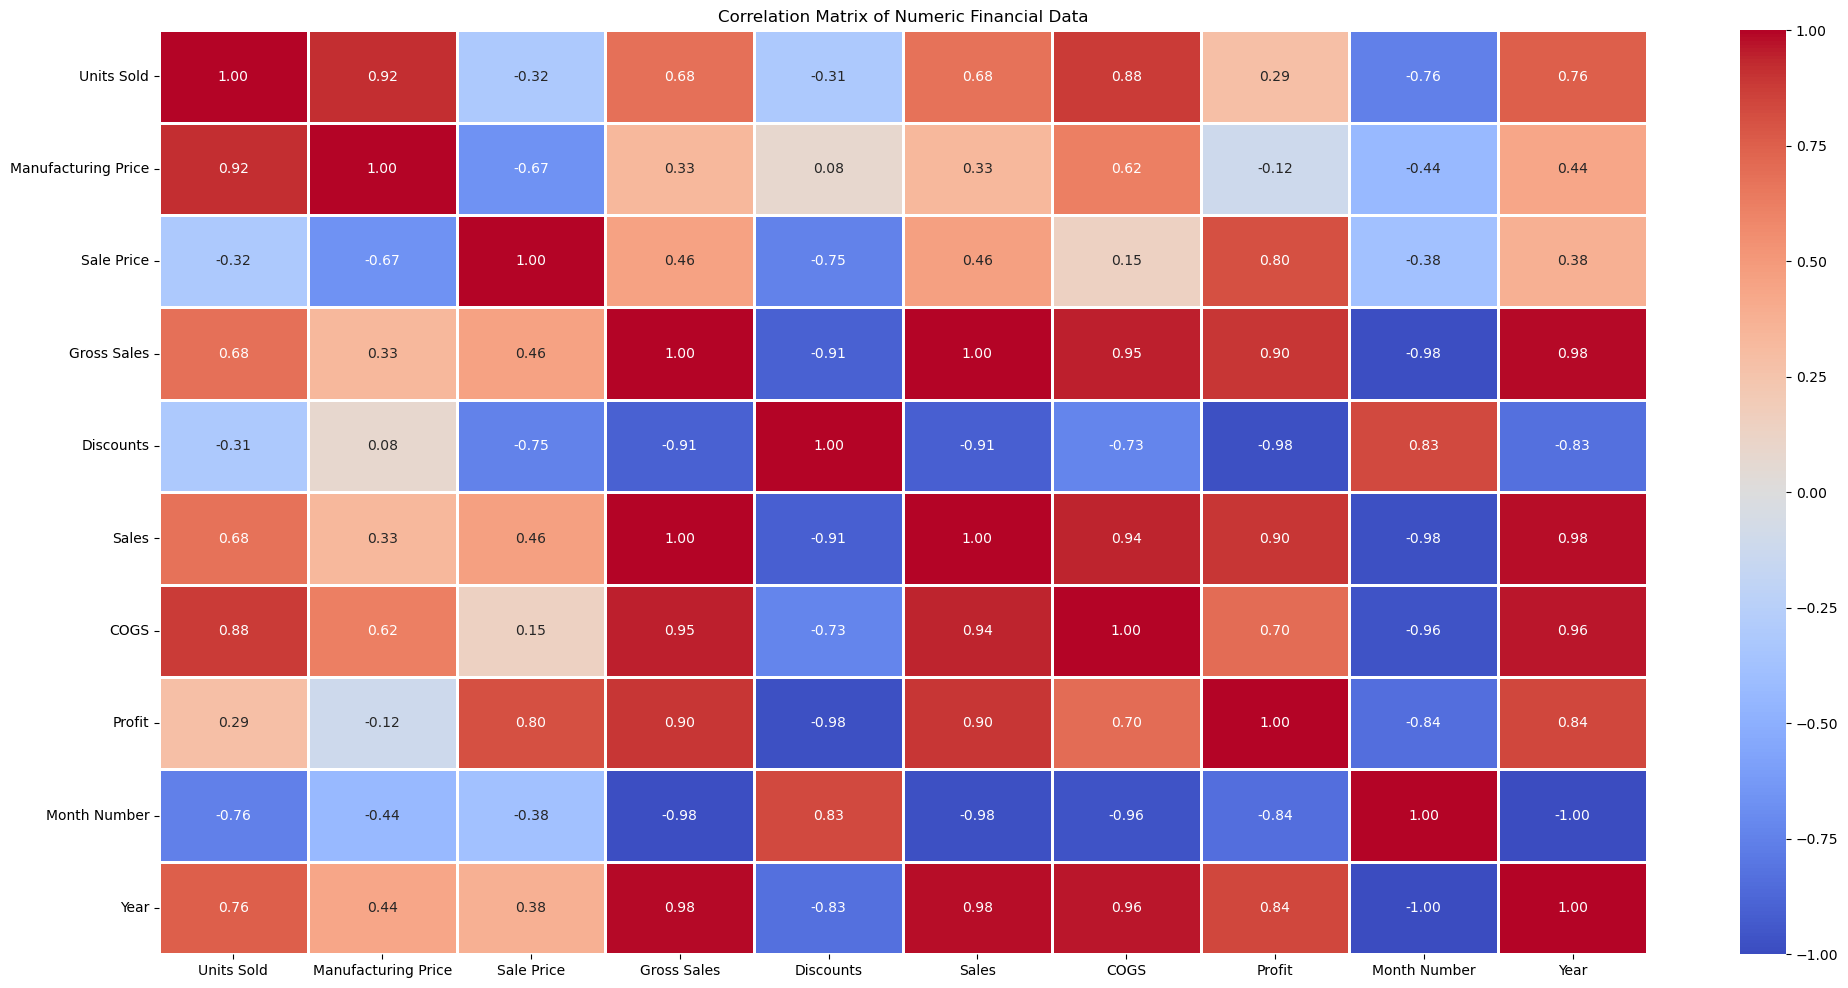

In [134]:
# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Select only the numeric columns to calculate the correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data
corr = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 12))
sb.heatmap(corr, annot=True, linewidths=1, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Financial Data')
plt.show()

## Duplicated data

#### The analysis of duplicate data in this dataset is interesting. There are many duplicate rows; however, in some cases, they could be coincidences of identical bookings for different clients. 
#### In this case, it is best to inquire a bit into the business to know what is really the possibility of identical bookings. 
#### As a last resort, if all duplicates are removed, there would still be enough data left for an interesting analysis

In [135]:
#Counting the duplicates in the dataframe
df.duplicated().sum()

np.int64(0)

In [136]:
#It allows you to see the duplicate rows in the entire dataframe
df.loc[df.duplicated(), :]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Product ID


In [137]:
#If you wanted to remove the duplicates
df_drop = df.drop_duplicates()
df_drop.shape

(4, 17)

## Data transformations

#### The transformations to be applied next depend on the analytical technique being used. It is not always necessary to apply all of them. In this notebook, all transformations will be applied as an example. 
#### It is important to understand the needs of each technique to apply the most suitable one.

### Normalization

#### Normalization or scaling is necessary to put all numerical variables on the same scale. 
#### Distance-based techniques always require normalization. The numerical variables are now normalized.

In [132]:
df_normalize = df.copy()

In [140]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Clean the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Select the numerical columns to normalize
columns_to_normalize = ['Units Sold', 'Gross Sales', 'Sales', 'Profit']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new DataFrame for normalized values
df_normalize = df.copy()

# Fit and transform the selected columns
df_normalize[columns_to_normalize] = scaler.fit_transform(df_normalize[columns_to_normalize])

# Display the last 10 rows of the normalized data
print(df_normalize[columns_to_normalize].tail(10))

     Units Sold  Gross Sales     Sales    Profit
0      0.346305     1.000000  1.000000  1.000000
53     1.000000     0.828575  0.821598  0.399470
213    0.217196     0.125496  0.125475  0.000000
455    0.000000     0.000000  0.000000  0.076962


## Discretization


#### To provide an example of discretization, the variable 'units sold,' which represents the number of units sold
#### First, the distribution of the variable is visualized

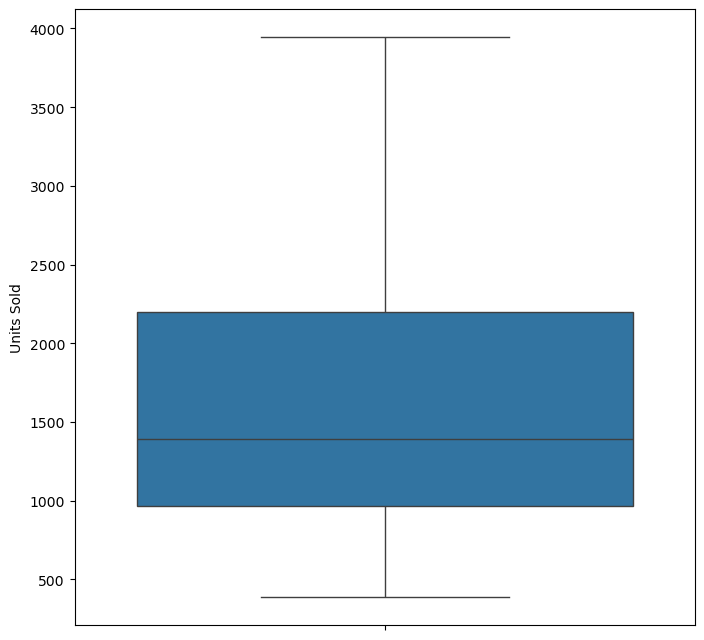

In [141]:
fig = plt.figure(figsize=(8,8))
sb.boxplot(y=df["Units Sold"])
plt.show()

#### Next, the bins are designed for discretizing the variable, and the discretization is performed

In [143]:
# Clean the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Define the bins and labels for the 'Units Sold' column
# I will use a simple, evenly-spaced binning for demonstration.
# Bins: 0-1000, 1001-2000, 2001-3000, >3000
units_bins = [0, 1000, 2000, 3000, df['Units Sold'].max() + 1]
units_labels = ['Small Order', 'Medium Order', 'Large Order', 'Extra-Large Order']

# Perform the discretization
df['Units_Sold_Category'] = pd.cut(
    df['Units Sold'],
    bins=units_bins,
    labels=units_labels,
    right=False
)

# Show the new column and its value counts
print(df[['Units Sold', 'Units_Sold_Category']].tail(10))
print("\nValue Counts for the new column:")
print(df['Units_Sold_Category'].value_counts())

     Units Sold Units_Sold_Category
0        1618.5        Medium Order
53       3945.0   Extra-Large Order
213      1159.0        Medium Order
455       386.0         Small Order

Value Counts for the new column:
Units_Sold_Category
Medium Order         2
Small Order          1
Extra-Large Order    1
Large Order          0
Name: count, dtype: int64


#### Once the variable is discretized, the results are visualized. It can be observed.

## Numerization


#### The objective of numerization is to convert different categorical variables into numbers. This can be very necessary for certain techniques that only work with numerical data. Below is how to numerize different variables in the dataset according to their type and value.
#### The following variables can be numerized one by one, which means we can replace the values with numbers

In [144]:
# Clean the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Create a dictionary to map month names to numbers
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Numerize the 'Month Name' column
df['Month_Numberized'] = df['Month Name'].map(month_to_num)

# Display the new column and its unique values to verify the numerization
print("Unique values in the original 'Month Name' column:")
print(df['Month Name'].unique())
print("\nUnique values in the new 'Month_Numberized' column:")
print(df['Month_Numberized'].unique())

Unique values in the original 'Month Name' column:
['January' 'October']

Unique values in the new 'Month_Numberized' column:
[ 1 10]


## Sampling Techniques

In [153]:
# Load the original financial data from the specified Excel file
# Use 'engine='openpyxl'' to ensure compatibility with .xlsx files.
try:
    df = pd.read_excel(r"D:\Exccel Work\Financial Sample.xlsx", engine='openpyxl')
except FileNotFoundError:
    print("Error: The file 'Financial Sample.xlsx' was not found at the specified path.")
    # Exit the script if the file is not found
    exit()

# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# --- 1. Simple Random Sampling ---
# Select a random sample of 10% of the entire dataset.
# The `frac=0.1` ensures the sample size is relative to the total number of rows.
simple_random_sample = df.sample(frac=0.1, random_state=42)
print("--- Simple Random Sample (10% of dataset) ---")
print(simple_random_sample.head())

# --- 2. Stratified Sampling ---
# Stratify the data by the 'Segment' column to ensure each group is proportionally represented.
# The `group_keys=False` prevents the grouping column from becoming part of the index.
stratified_sample = df.groupby('Segment', group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42)
)

print("\n--- Stratified Sample (10% of each Segment) ---")
print(stratified_sample['Segment'].value_counts(normalize=True))
print("\nOriginal Data Segment Proportions:")
print(df['Segment'].value_counts(normalize=True))

# --- 3. Systematic Sampling ---
# Select every 10th row from the dataset after a random starting point.
n = 10
start_index = np.random.randint(0, n)
systematic_sample = df.iloc[start_index::n]

print("\n--- Systematic Sample (Every 10th row) ---")
print(systematic_sample.head())


--- Simple Random Sample (10% of dataset) ---
              Segment  Country   Product Discount Band  Units Sold  \
158    Small Business  Germany     Paseo           Low       689.0   
500  Channel Partners   Mexico       VTT          High      1005.0   
396        Government  Germany  Amarilla        Medium      1366.0   
155    Small Business   France     Paseo           Low      2434.5   
321        Government   Canada      Velo        Medium      1582.0   

     Manufacturing Price  Sale Price  Gross Sales  Discounts      Sales  \
158                   10         300     206700.0    6201.00  200499.00   
500                  250          12      12060.0    1326.60   10733.40   
396                  260          20      27320.0    2185.60   25134.40   
155                   10         300     730350.0   21910.50  708439.50   
321                  120           7      11074.0     775.18   10298.82   

         COGS    Profit       Date  Month Number Month Name  Year  \
158  172250.0

C:\Users\pc\AppData\Local\Temp\ipykernel_2640\3608822414.py:23: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### This result show that all three sampling techniques — simple random, stratified, and systematic — were successfully applied to the dataset. The simple random sample provided a random subset, the stratified sample maintained the original proportions of different segments, and the systematic sample selected rows at a fixed interval.

## Conclusions

#### Throughout this project, we have successfully completed a comprehensive series of data operations. We began with fundamental **data cleaning**, which included removing **redundant data** and **data duplication**, and carefully checking data types to ensure consistency. We then moved on to more advanced preparation techniques, such as **numerization** and **discretization**, to transform variables for analysis. Finally, we created various **data visualizations** to gain valuable insights, leaving the dataset clean, well-structured, and ready for further exploration and modeling.